In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [47]:
df=pd.read_csv('Algerian_forest_fires_cleaned_dataset.csv')

In [48]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [49]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [50]:
##drop month,day and yyear
df.drop(['day','month','year'],axis=1,inplace=True)

In [51]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [52]:
df['Classes'].value_counts()

,count
Classes,
fire,131
not fire,101
fire,4
fire,2
not fire,2
not fire,1
not fire,1
not fire,1


In [53]:
## Encoding
df['Classes']=np.where(df['Classes'].str.contains("not fire"),0,1)

In [54]:
df['Classes'].value_counts()

,count
Classes,
1,137
0,106


In [55]:
df.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1
242,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,1


In [56]:
## Independent And dependent features
X=df.drop('FWI',axis=1)
y=df['FWI']

In [57]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [58]:
y

,FWI
0,0.5
1,0.4
2,0.1
3,0.0
4,0.5
...,...
238,6.5
239,0.0
240,0.2
241,0.7


In [59]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=30)

In [60]:
X_train.shape,X_test.shape

((182, 11), (61, 11))

In [61]:
## Feature Selection based on correlaltion
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.690371,-0.347873,-0.378804,0.710585,0.506686,0.367543,0.646454,0.468863,0.562475,0.320558
RH,-0.690371,1.000000,0.334578,0.248352,-0.663184,-0.373897,-0.194968,-0.675584,-0.317908,-0.432147,-0.414862
Ws,-0.347873,0.334578,1.000000,0.258598,-0.257855,-0.047262,0.048637,-0.093250,-0.009359,-0.146438,-0.246794
Rain,-0.378804,0.248352,0.258598,1.000000,-0.542030,-0.279336,-0.286105,-0.339039,-0.286169,-0.355443,-0.086663
FFMC,0.710585,-0.663184,-0.257855,-0.542030,1.000000,0.605402,0.492913,0.730174,0.585216,0.752944,0.251812
DMC,0.506686,-0.373897,-0.047262,-0.279336,0.605402,1.000000,0.888338,0.658708,0.982777,0.598370,0.179483
DC,0.367543,-0.194968,0.048637,-0.286105,0.492913,0.888338,1.000000,0.493053,0.945940,0.506001,-0.103879
ISI,0.646454,-0.675584,-0.093250,-0.339039,0.730174,0.658708,0.493053,1.000000,0.622842,0.735164,0.267245
BUI,0.468863,-0.317908,-0.009359,-0.286169,0.585216,0.982777,0.945940,0.622842,1.000000,0.592418,0.068597
Classes,0.562475,-0.432147,-0.146438,-0.355443,0.752944,0.598370,0.506001,0.735164,0.592418,1.000000,0.199263


<Axes: >

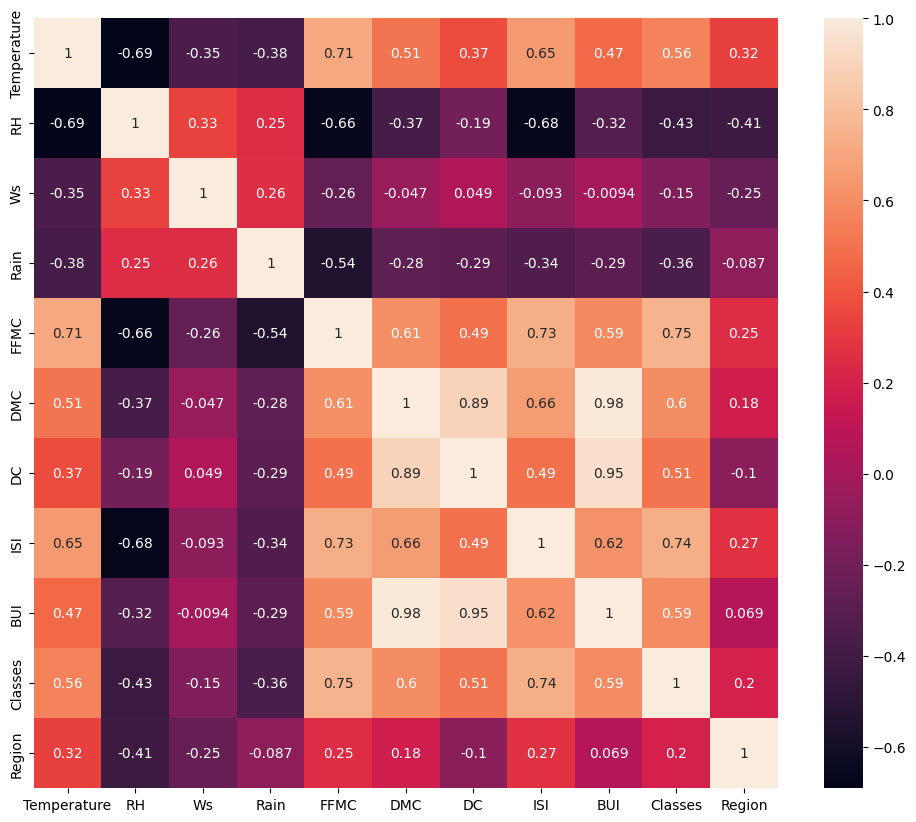

In [62]:
## Check for multicollinearity
plt.figure(figsize=(12,10))
corr=X_train.corr()
sns.heatmap(corr,annot=True)

In [63]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.690371,-0.347873,-0.378804,0.710585,0.506686,0.367543,0.646454,0.468863,0.562475,0.320558
RH,-0.690371,1.000000,0.334578,0.248352,-0.663184,-0.373897,-0.194968,-0.675584,-0.317908,-0.432147,-0.414862
Ws,-0.347873,0.334578,1.000000,0.258598,-0.257855,-0.047262,0.048637,-0.093250,-0.009359,-0.146438,-0.246794
Rain,-0.378804,0.248352,0.258598,1.000000,-0.542030,-0.279336,-0.286105,-0.339039,-0.286169,-0.355443,-0.086663
FFMC,0.710585,-0.663184,-0.257855,-0.542030,1.000000,0.605402,0.492913,0.730174,0.585216,0.752944,0.251812
DMC,0.506686,-0.373897,-0.047262,-0.279336,0.605402,1.000000,0.888338,0.658708,0.982777,0.598370,0.179483
DC,0.367543,-0.194968,0.048637,-0.286105,0.492913,0.888338,1.000000,0.493053,0.945940,0.506001,-0.103879
ISI,0.646454,-0.675584,-0.093250,-0.339039,0.730174,0.658708,0.493053,1.000000,0.622842,0.735164,0.267245
BUI,0.468863,-0.317908,-0.009359,-0.286169,0.585216,0.982777,0.945940,0.622842,1.000000,0.592418,0.068597
Classes,0.562475,-0.432147,-0.146438,-0.355443,0.752944,0.598370,0.506001,0.735164,0.592418,1.000000,0.199263


In [64]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [65]:
corr_matrix = X_train.corr()
corr_matrix.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'Classes', 'Region'],
      dtype='object')

In [66]:
## threshold--Domain expertise
corr_features=correlation(X_train,0.85)

In [67]:
corr_features

{'BUI', 'DC'}

In [68]:
## drop features when correlation is more than 0.85
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)
X_train.shape,X_test.shape

((182, 9), (61, 9))

In [69]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [70]:
X_train_scaled

array([[-2.75267926,  1.6278135 , -0.19743482, ..., -1.14554837,
        -1.12915898, -1.        ],
       [ 1.79688785, -1.21767867, -1.23396765, ...,  1.1973079 ,
         0.88561489,  1.        ],
       [-1.14694969,  1.49546503,  0.839098  , ..., -0.04733449,
         0.88561489, -1.        ],
       ...,
       [-0.34408491,  0.63519995,  0.49358706, ...,  0.53837958,
         0.88561489,  1.        ],
       [ 0.45877988, -1.0853302 ,  0.49358706, ...,  1.51456969,
         0.88561489,  1.        ],
       [ 0.19115828,  0.43667724,  1.18460894, ...,  0.3187368 ,
         0.88561489, -1.        ]])

Text(0.5, 1.0, 'X_train After Scaling')

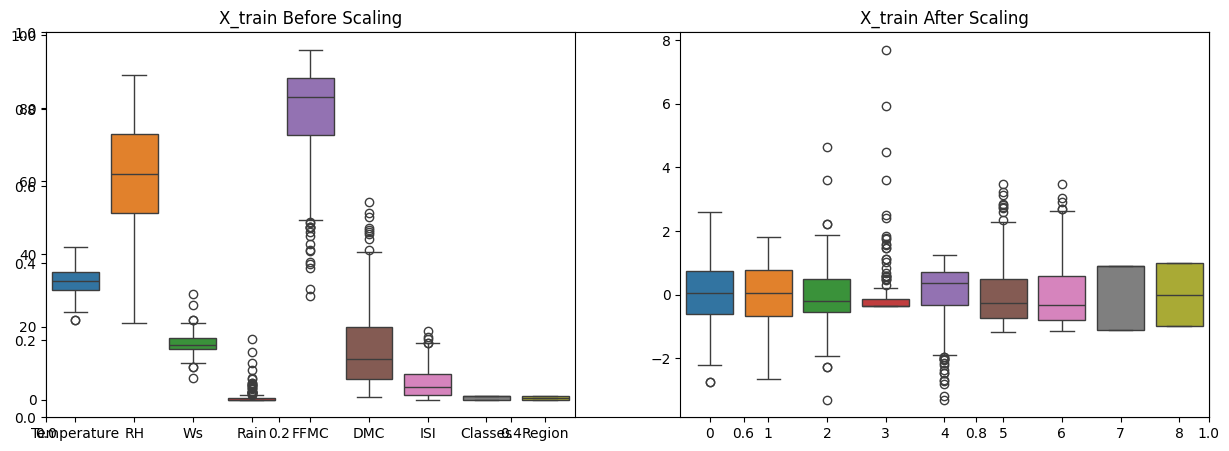

In [71]:
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title('X_train Before Scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train After Scaling')

Mean absolute error 0.7594584447710337
R2 Score 0.9846376967996331


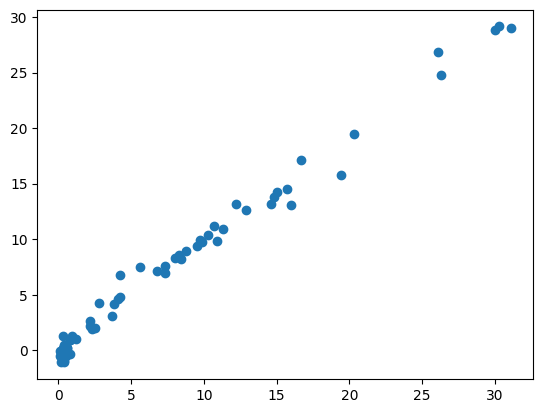

In [72]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
linreg=LinearRegression()
linreg.fit(X_train_scaled,y_train)
y_pred=linreg.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

Mean absolute error 1.4089572022403432
R2 Score 0.9447658011945692


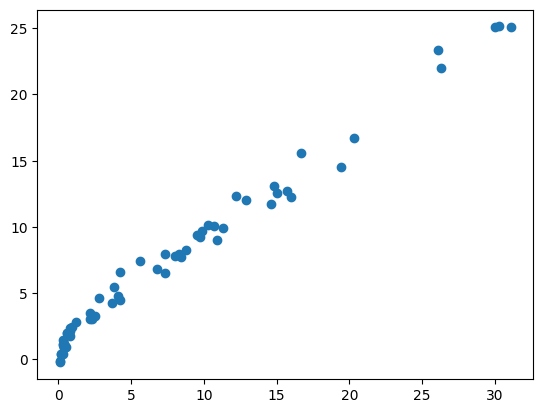

In [73]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lasso=Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred=lasso.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

In [74]:
from sklearn.linear_model import LassoCV
lassocv=LassoCV(cv=5)
lassocv.fit(X_train_scaled,y_train)

LassoCV(cv=5)

Mean absolute error 0.7509843027442675
R2 Score 0.9845461888992418


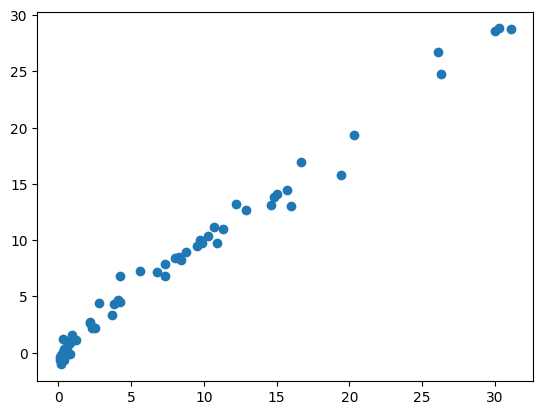

In [75]:
y_pred=lassocv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

Mean absolute error 0.770846563139141
R2 Score 0.9841463879470227


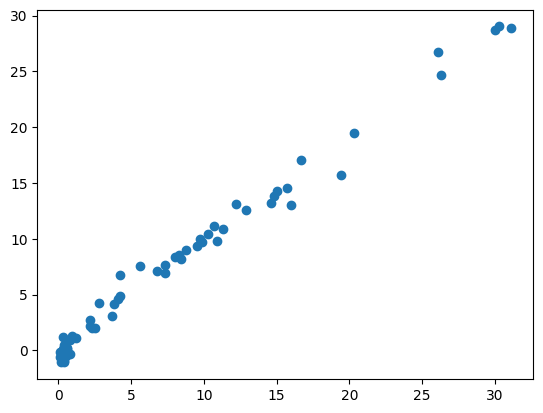

In [76]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ridge=Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred=ridge.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

Mean absolute error 0.770846563139141
R2 Score 0.9841463879470227


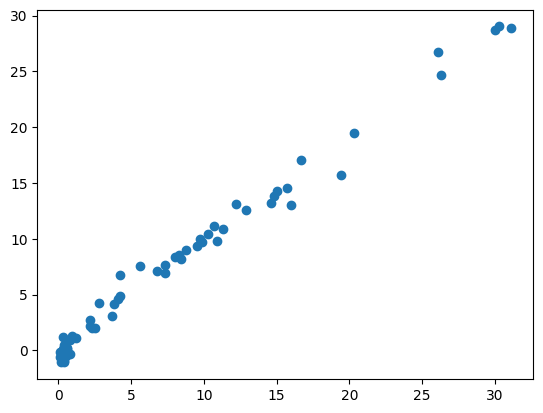

In [77]:
from sklearn.linear_model import RidgeCV
ridgecv=RidgeCV(cv=5)
ridgecv.fit(X_train_scaled,y_train)
y_pred=ridgecv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

In [78]:
ridgecv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_results': None,
 'store_cv_values': 'deprecated'}

In [79]:
lassocv.get_params()


{'alphas': None,
 'copy_X': True,
 'cv': 5,
 'eps': 0.001,
 'fit_intercept': True,
 'max_iter': 1000,
 'n_alphas': 100,
 'n_jobs': None,
 'positive': False,
 'precompute': 'auto',
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'verbose': False}

Mean absolute error 2.015132486933135
R2 Score 0.8730538527962128


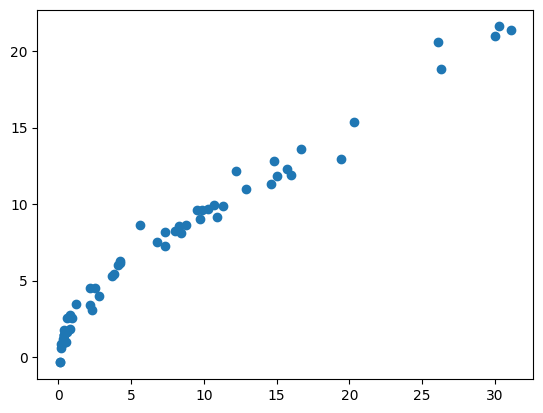

In [80]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
elastic=ElasticNet()
elastic.fit(X_train_scaled,y_train)
y_pred=elastic.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

Mean absolute error 0.7832754004295143
R2 Score 0.9834202067429748


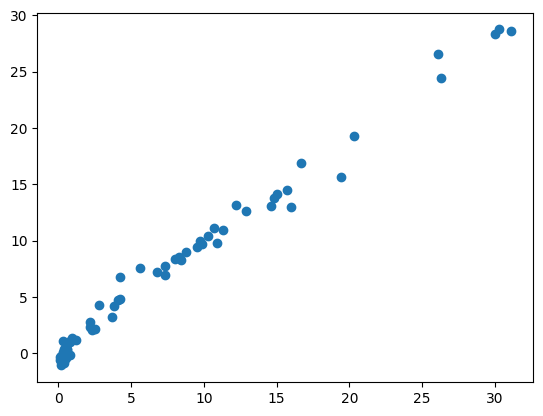

In [81]:
from sklearn.linear_model import ElasticNetCV
elasticcv=ElasticNetCV(cv=5)
elasticcv.fit(X_train_scaled,y_train)
y_pred=elasticcv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

In [82]:
elasticcv.alphas_

array([12.91216483, 12.04192814, 11.23034248, 10.47345499,  9.76757917,
        9.10927703,  8.49534224,  7.92278461,  7.38881544,  6.89083401,
        6.42641486,  5.99329601,  5.58936792,  5.21266323,  4.86134717,
        4.53370864,  4.22815185,  3.94318857,  3.67743086,  3.42958433,
        3.19844182,  2.98287755,  2.78184158,  2.59435477,  2.41950394,
        2.25643747,  2.10436114,  1.96253424,  1.830266  ,  1.7069122 ,
        1.59187203,  1.48458518,  1.38452911,  1.29121648,  1.20419281,
        1.12303425,  1.0473455 ,  0.97675792,  0.9109277 ,  0.84953422,
        0.79227846,  0.73888154,  0.6890834 ,  0.64264149,  0.5993296 ,
        0.55893679,  0.52126632,  0.48613472,  0.45337086,  0.42281519,
        0.39431886,  0.36774309,  0.34295843,  0.31984418,  0.29828775,
        0.27818416,  0.25943548,  0.24195039,  0.22564375,  0.21043611,
        0.19625342,  0.1830266 ,  0.17069122,  0.1591872 ,  0.14845852,
        0.13845291,  0.12912165,  0.12041928,  0.11230342,  0.10

In [83]:
lassocv.alphas_

array([6.45608242, 6.02096407, 5.61517124, 5.23672749, 4.88378959,
       4.55463851, 4.24767112, 3.96139231, 3.69440772, 3.44541701,
       3.21320743, 2.996648  , 2.79468396, 2.60633161, 2.43067359,
       2.26685432, 2.11407593, 1.97159429, 1.83871543, 1.71479216,
       1.59922091, 1.49143877, 1.39092079, 1.29717739, 1.20975197,
       1.12821874, 1.05218057, 0.98126712, 0.915133  , 0.8534561 ,
       0.79593602, 0.74229259, 0.69226456, 0.64560824, 0.60209641,
       0.56151712, 0.52367275, 0.48837896, 0.45546385, 0.42476711,
       0.39613923, 0.36944077, 0.3445417 , 0.32132074, 0.2996648 ,
       0.2794684 , 0.26063316, 0.24306736, 0.22668543, 0.21140759,
       0.19715943, 0.18387154, 0.17147922, 0.15992209, 0.14914388,
       0.13909208, 0.12971774, 0.1209752 , 0.11282187, 0.10521806,
       0.09812671, 0.0915133 , 0.08534561, 0.0795936 , 0.07422926,
       0.06922646, 0.06456082, 0.06020964, 0.05615171, 0.05236727,
       0.0488379 , 0.04554639, 0.04247671, 0.03961392, 0.03694

In [84]:
import pickle
pickle.dump(ridge,open('ridge.pkl','wb'))

In [85]:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))

In [86]:
# model=pickle.load(open('regressor.pkl','rb'))
# model.predict(X_test)